<a href="https://colab.research.google.com/github/mahdiimanzadeh/Anomaly-Detection-MNIST/blob/main/Anomaly_Detection_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!git config --global user.email "mahdiimanzadeh15@gmail.com"
!git config --global user.name "mahdiimanzadeh"


In [2]:
!git clone https://github.com/mahdiimanzadeh/Anomaly-Detection-MNIST.git


Cloning into 'Anomaly-Detection-MNIST'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [5]:
!git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [11]:
!git add Anomaly-Detection-MNIST.ipynb


fatal: pathspec 'Anomaly-Detection-MNIST.ipynb' did not match any files


In [12]:
%cd Anomaly-Detection-MNIST


/content/Anomaly-Detection-MNIST


In [13]:
!ls


README.md


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/mnist_with_anomalies.csv')

In [ ]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(6963, 784)

In [ ]:
anomaly_indices = [2658, 2609, 2597, 863, 790, 712, 701, 663, 401, 352, 329, 223, 143, 81,
                   6857, 6535, 6235, 6229, 6065, 3295, 3203, 3093, 2781, 2765, 2726, 2704]

In [ ]:
import numpy as np

df = df.astype(np.float32) / 255.0
x_train = np.delete(df, anomaly_indices, axis=0)

In [ ]:
df.loc[2658]

,2658
pixel1,0.0
pixel2,0.0
pixel3,0.0
pixel4,0.0
pixel5,0.0
...,...
pixel780,0.0
pixel781,0.0
pixel782,0.0
pixel783,0.0


In [ ]:
x_test = df.loc[anomaly_indices]

In [ ]:
x_train.shape

(6937, 784)

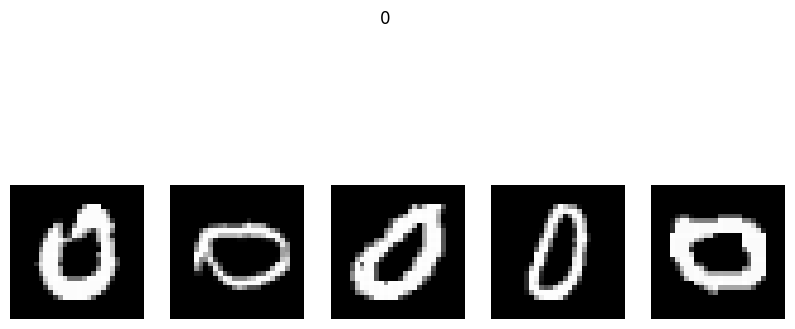

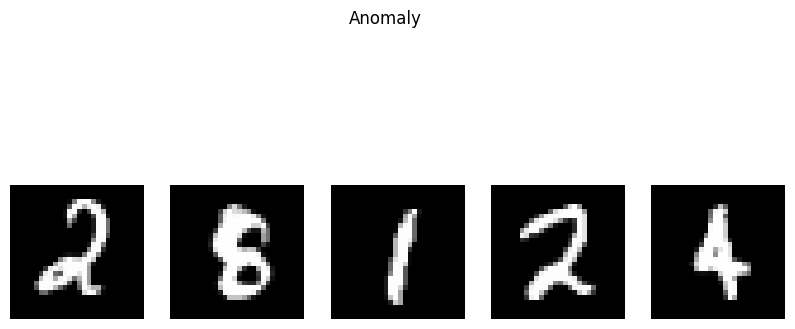

In [ ]:
import matplotlib.pyplot as plt

# نمایش چند نمونه از داده‌های نرمال
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle("0")
plt.show()

# نمایش چند نمونه از داده‌های آنومالی
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle("Anomaly")
plt.show()


# Autoencoder

## Define encoder


In [ ]:
from tensorflow.keras import layers, models

input_img = layers.Input(shape=(x_train.shape[1],)) # Input Layer

## hidden layers

In [ ]:
encoded = layers.Dense(200, activation='relu')(input_img) # first hidden layer
encoded = layers.Dense(100, activation='relu')(encoded) # second hidden layer
encoded = layers.Dense(50, activation='relu')(encoded) # third hidden layer

In [ ]:
bottleneck = layers.Dense(25, activation='relu')(encoded) # latent space
encoder = models.Model(input_img,bottleneck,name='encoder')

## Define decoder


In [ ]:
decoded = layers.Dense(50, activation='relu')(bottleneck) #first hidden layer
decoded = layers.Dense(100, activation='relu')(decoded) #second hidden layer
decoded = layers.Dense(200, activation='relu')(decoded) #third hidden layer
decoded = layers.Dense(x_train.shape[1],activation='sigmoid')(decoded) #output layer
decoder = models.Model(bottleneck, decoded, name='decoder')

## Define autoencoder


In [ ]:
autoencoder_input = layers.Input(shape=(x_train.shape[1],)) # input layer
encoded_repr = encoder(autoencoder_input) # encoder output
decoded_output = decoder(encoded_repr) # decoder output
autoencoder = models.Model(autoencoder_input, decoded_output, name='autoencoder')  ## Autoencoder model
autoencoder.compile(optimizer='adam',loss='mse')  # Compile model with Adam optimizer and MSE loss

## Train autoencoder


In [ ]:
autoencoder.fit(x_train,x_train, epochs=40, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.1761 - val_loss: 0.1144
Epoch 2/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0674 - val_loss: 0.1033
Epoch 3/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0640 - val_loss: 0.1012
Epoch 4/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0570 - val_loss: 0.0961
Epoch 5/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0499 - val_loss: 0.0890
Epoch 6/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0416 - val_loss: 0.0808
Epoch 7/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0376 - val_loss: 0.0769
Epoch 8/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0336 - val_loss: 0.0734
Epoch 9/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0315 - val_loss: 0.0720
Epoch 10/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0301 - val_loss: 0.0721
Epoch 11/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0285 - val_loss: 0.0711
Epoch 12/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0

## Calculate reconstruction loss


In [ ]:
def calculate_reconstruction_loss(data,model):
  reconstructions = model.predict(data)  # Get model predictions
  reconstruction_errors = np.mean(np.abs(data - reconstructions), axis =1) # Compute mean absolute error
  return reconstruction_errors

## Evaluate the model


In [ ]:
reconstruction_loss_normal = calculate_reconstruction_loss(x_train, autoencoder)
reconstruction_loss_anomalous = calculate_reconstruction_loss(x_test, autoencoder)

217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


## Print average reconstruction loss


In [ ]:
print(f"Average Reconstruction Loss for Normal Data: {np.mean(reconstruction_loss_normal)}")
print(f"Average Reconstruction Loss for Normal Data: {np.mean(reconstruction_loss_anomalous)}")


Average Reconstruction Loss for Normal Data: 0.043661897667946904
Average Reconstruction Loss for Normal Data: 0.11321512903077503


## Visualization of reconstruction error distribution


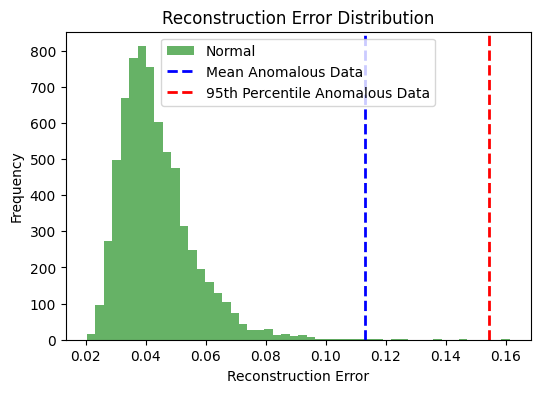

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 4))
plt.hist(reconstruction_loss_normal, bins=50, alpha=0.6, color='g', label='Normal')  # Histogram for normal data
plt.axvline(x=np.mean(reconstruction_loss_anomalous), color='b', linestyle='dashed', linewidth=2, label='Mean Anomalous Data')
plt.axvline(x=np.percentile(reconstruction_loss_anomalous, 95), color='r', linestyle='dashed', linewidth=2, label='95th Percentile Anomalous Data')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# GMM


In [ ]:
from sklearn.mixture import GaussianMixture

best_n = None
lowest_bic = np.inf

for n in range(1, 6):  # تست 1 تا 5 مؤلفه گاوسی
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm.fit(x_train)
    bic = gmm.bic(x_train)
    print(f"GMM با {n} مؤلفه -> BIC: {bic}")

    if bic < lowest_bic:
        lowest_bic = bic
        best_n = n

print(f"مقدار بهینه n_components: {best_n}")

# مدل نهایی با مقدار بهینه
gmm = GaussianMixture(n_components=best_n, covariance_type='full', random_state=42)
gmm.fit(x_train)

GMM با 1 مؤلفه -> BIC: -27320264.739137843
GMM با 2 مؤلفه -> BIC: -27972443.46600134
GMM با 3 مؤلفه -> BIC: -26814756.09211556
GMM با 4 مؤلفه -> BIC: -24696802.99052431
GMM با 5 مؤلفه -> BIC: -22522531.680557705
مقدار بهینه n_components: 2


GaussianMixture(n_components=2, random_state=42)

In [ ]:
log_likelihood_normal = gmm.score_samples(x_train)
log_likelihood_anomaly = gmm.score_samples(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  warnings.warn(


In [ ]:
threshold = np.percentile(log_likelihood_normal, 5)
print(f"آستانه تشخیص آنومالی: {threshold:.2f}")


آستانه تشخیص آنومالی: 2127.76


In [ ]:
detected_anomalies = log_likelihood_anomaly < threshold
accuracy = np.sum(detected_anomalies) / len(anomaly_indices)
print(f"تعداد آنومالی‌های شناسایی‌شده: {np.sum(detected_anomalies)} از {len(anomaly_indices)}")
print(f"دقت: {accuracy:.2f}")

تعداد آنومالی‌های شناسایی‌شده: 23 از 26
دقت: 0.88


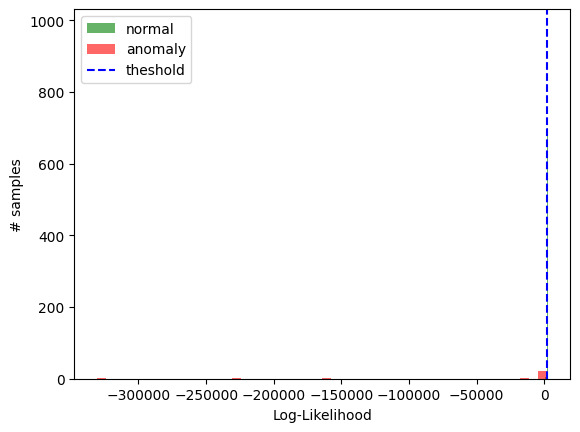

In [ ]:
import matplotlib.pyplot as plt

plt.hist(log_likelihood_normal, bins=50, alpha=0.6, color='g', label='normal')
plt.hist(log_likelihood_anomaly, bins=50, alpha=0.6, color='r', label='anomaly')
plt.axvline(threshold, color='b', linestyle='--', label='theshold')
plt.xlabel('Log-Likelihood')
plt.ylabel('# samples')
plt.legend()
plt.show()

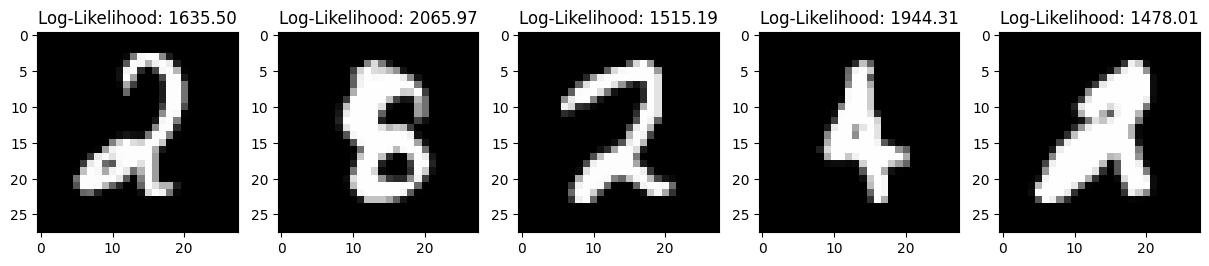

In [ ]:
detected_indices = np.where(detected_anomalies)[0]
plt.figure(figsize=(15, 3))
for i, idx in enumerate(detected_indices[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test.to_numpy()[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Log-Likelihood: {log_likelihood_anomaly[idx]:.2f}')
plt.show()

# PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

pca = PCA(n_components=50)
X_pca = pca.fit(x_train)

explained_variance = pca.explained_variance_ratio_.sum()
print(f"Varicance with {50} components: {explained_variance:.2f}")


Varicance with 50 components: 0.88


In [ ]:
x_train_pca = pca.transform(x_train)
x_train_reconstucted = pca.inverse_transform(x_train_pca)

reconstruction_error = np.mean((x_train - x_train_reconstucted) **2 , axis =1)

In [ ]:
threshold_pca = np.percentile(reconstruction_error, 98)
print(f"threshold for PCA is:{threshold_pca:.2f}")

threshold for PCA is:0.02


In [ ]:
anomaly_pca = pca.transform(x_test)
anomaly_reconstructed = pca.inverse_transform(anomaly_pca)
anomaly_error = np.mean((x_test - anomaly_reconstructed) **2, axis =1)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [ ]:
detected_anomalies = anomaly_error > threshold_pca
accuracy = np.sum(detected_anomalies) / len(anomaly_indices)

print(f"# of anomalies: {np.sum(detected_anomalies)} from {26}")
print(f"accuracy: {accuracy:.2f}")


# of anomalies: 24 from 26
accuracy: 0.92


In [ ]:
# Assume predictions from each method (replace with your actual results)
autoencoder_pred = anomaly_error_autoencoder > threshold_autoencoder
gmm_pred = log_likelihood_anomaly < threshold_gmm
pca_pred = anomaly_error_pca > threshold_pca